In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
from flipside import Flipside
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
import flipside_queries as flip
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extract, Transform and Loa TIME_SERIES Table

In [10]:
#Extract data prepared from Flipside
# Getting the timeserie query 
url = "https://api.flipsidecrypto.com/api/v2/queries/f77d1b5d-46dc-4541-88aa-7d2e25c4d6d6/data/latest"
response = requests.get(url)
data = response.json()
df_serie = pd.DataFrame(data)

df_serie.head()

,MONTH,TOTAL_TRADERS,NEW_TRADERS,NEW_TRADERS_PERCENT,OLD_TRADERS_PERCENT,STICKINESS,SWAP_COUNT,VOL_USD,AVG_TX_VALUE,REVENUE_USD,AVG_GAS_PRICE,INTEREST_RATE_PERCENT
0,2021-05-01,272106,272106,1.000,0.000,0.055,805024,3.123526e+10,38800.411084,9.117429e+09,121.115821,0.06
1,2021-06-01,253085,187319,0.740,0.260,0.062,1218939,2.746436e+10,22531.367194,5.931784e+09,28.342333,0.08
2,2021-07-01,269527,171543,0.636,0.364,0.066,1459147,2.604685e+10,17850.738024,4.566772e+09,34.348756,0.10
3,2021-08-01,251149,133181,0.530,0.470,0.065,1231707,3.956022e+10,32118.205792,6.530900e+09,69.602159,0.09
4,2021-09-01,219859,106122,0.483,0.517,0.064,1042250,3.921526e+10,37625.579503,7.736535e+09,108.640721,0.08


In [21]:
#Loading data into google sheet, tab TIME_SERIES
# Connecting with Google Client
scope = ['https://www.googleapis.com/auth/spreadsheets',
                    'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file("gpe_projects_key.json", scopes=scope)
client = gspread.authorize(creds)  

 # Opening google sheet
google_sh = client.open('univ3_behaviour')
sheet_mkt = google_sh.worksheet('TIME_SERIES') #TIME_SERIES TAB

# write to dataframe
sheet_mkt.clear()
set_with_dataframe(worksheet=sheet_mkt, dataframe=df_serie, include_index=False,
include_column_header=True, resize=True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'TOTAL_TRADERS'),
  Text(0, 1.5, 'NEW_TRADERS'),
  Text(0, 2.5, 'NEW_TRADERS_PERCENT'),
  Text(0, 3.5, 'OLD_TRADERS_PERCENT'),
  Text(0, 4.5, 'STICKINESS'),
  Text(0, 5.5, 'SWAP_COUNT'),
  Text(0, 6.5, 'VOL_USD'),
  Text(0, 7.5, 'AVG_TX_VALUE'),
  Text(0, 8.5, 'REVENUE_USD'),
  Text(0, 9.5, 'AVG_GAS_PRICE'),
  Text(0, 10.5, 'INTEREST_RATE_PERCENT')])

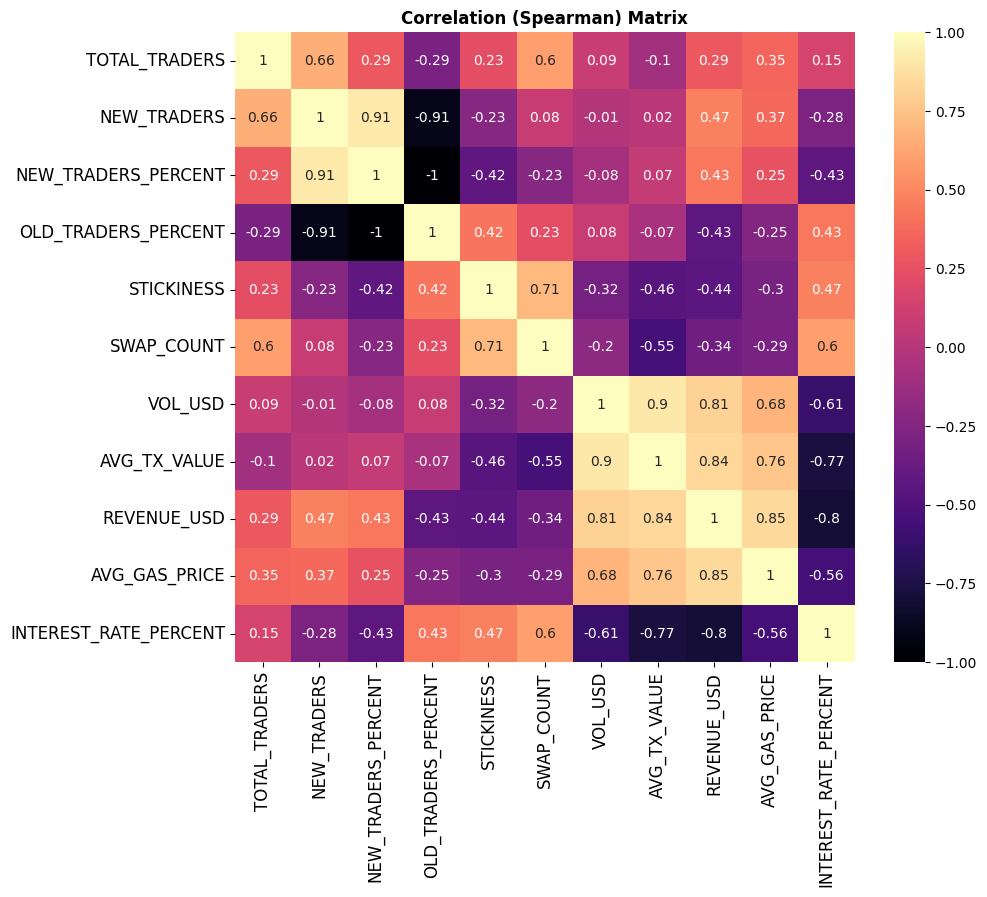

In [19]:
#Correlation Matrix
corr_inc = df_serie.iloc[:,1:].corr()
sea.heatmap(round(corr_inc,2), annot = True,cmap = 'magma')
plt.title("Correlation (Spearman) Matrix", fontweight = 'bold', fontsize = 12)

#Setting
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = .25)
plt.xticks(size = 12)
plt.yticks(size = 12)


## Extract, Transform and Load COHORT_ANALYSIS Table

In [26]:
#Extract data prepared from Flipside
# Getting the cohort_analysis query
url = "https://api.flipsidecrypto.com/api/v2/queries/0216a76e-9fa6-43e2-b9aa-1701be2f8d75/data/latest"
response = requests.get(url)
data = response.json()
df_cohort= pd.DataFrame(data)

df_cohort.head()

,MONTH,COHORT_ID,TOTAL_USERS,USER_COHORT,VOL_USD,VOL_USD_COHORT,FEE_USD,FEE_USD_COHORT,SWAP_COUNT,SWAP_COUNT_COHORT,AVG_TX_VALUE,AVG_TX_VALUE_COHORT
0,2021-05-01,0,272106,272106,3.123526e+10,3.123526e+10,9.117429e+09,9.117429e+09,805024,805024,38800.411084,38800.411084
1,2021-05-01,1,272106,65766,3.123526e+10,1.617555e+10,9.117429e+09,3.787946e+09,805024,559458,38800.411084,28912.888246
2,2021-05-01,2,272106,47527,3.123526e+10,8.183132e+09,9.117429e+09,1.575738e+09,805024,441539,38800.411084,18533.202287
3,2021-05-01,3,272106,44203,3.123526e+10,9.542895e+09,9.117429e+09,1.705038e+09,805024,343257,38800.411084,27801.019463
4,2021-05-01,4,272106,38828,3.123526e+10,8.481758e+09,9.117429e+09,1.999268e+09,805024,274163,38800.411084,30936.917348


In [27]:
#Loading data into google sheet, tab COHORT_ANALYSIS
# Connecting with Google Client
scope = ['https://www.googleapis.com/auth/spreadsheets',
                    'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file("gpe_projects_key.json", scopes=scope)
client = gspread.authorize(creds)  

 # Opening google sheet
google_sh = client.open('univ3_behaviour')
sheet_mkt = google_sh.worksheet('COHORT_ANALYSIS') #TIME_SERIES TAB

# write to dataframe
sheet_mkt.clear()
set_with_dataframe(worksheet=sheet_mkt, dataframe=df_cohort, include_index=False,
include_column_header=True, resize=True)


## Extract, Transform and Load METRICS_BY_USER Table

In [34]:
sdk = Flipside(os.getenv('FLIPSIDE_API_KEY'), "https://api-v2.flipsidecrypto.xyz")
sql =  flip.users
# Query results page by page and saves the results in a list
# If nothing is returned then just stop the loop and start adding the data to the dataframe
result_list = []
for i in range(1,11): # max is a million rows @ 100k per page
    data=sdk.query(sql,page_size=100000,page_number=i)
    if data.run_stats.record_count == 0:  
        break
    else:
        result_list.append(data.records)
    
# Loops through the returned results and adds into a pandas dataframe
result_df=pd.DataFrame()
for idx, each_list in enumerate(result_list):
    if idx == 0:
        result_df=pd.json_normalize(each_list)
    else:
        result_df=pd.concat([result_df, pd.json_normalize(each_list)])


In [51]:
# Download csv
# result_df.to_csv("dataset/metrics_by_user.csv",index= False)

In [ ]:
#Loading data into google sheet, tab METRICS_BY_USER
# Connecting with Google Client
scope = ['https://www.googleapis.com/auth/spreadsheets',
                    'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file("gpe_projects_key.json", scopes=scope)
client = gspread.authorize(creds)  

 # Opening google sheet
google_sh = client.open('univ3_behaviour')
sheet_mkt = google_sh.worksheet('METRICS_BY_USER') # METRICS_BY_USER TAB

# write to dataframe
sheet_mkt.clear()
set_with_dataframe(worksheet=sheet_mkt, dataframe=result_df, include_index=False,
include_column_header=True, resize=True)


## K-means Clustering Application

In [42]:

# Feature Engineering
features = ['swap_count', 'vol_usd', 'revenue_usd', 'avg_tx_value', 'avg_gas_price']
data_clustering = result_df[features]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)
data_normalized_df = pd.DataFrame(data_normalized, columns=features)


data_normalized_df.head()


,swap_count,vol_usd,revenue_usd,avg_tx_value,avg_gas_price
0,113.773126,340.270165,220.181458,1.901972,7.617860
1,9.208562,256.405912,20.898106,18.862961,-0.459009
2,82.359297,245.688079,481.511640,1.896437,0.607542
3,118.926552,203.133994,133.654215,1.021945,1.344353
4,140.745858,187.485396,156.870174,0.764028,-0.083055


/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Uniswap-User-Behaviour/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Uniswap-User-Behaviour/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Uniswap-User-Behaviour/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input

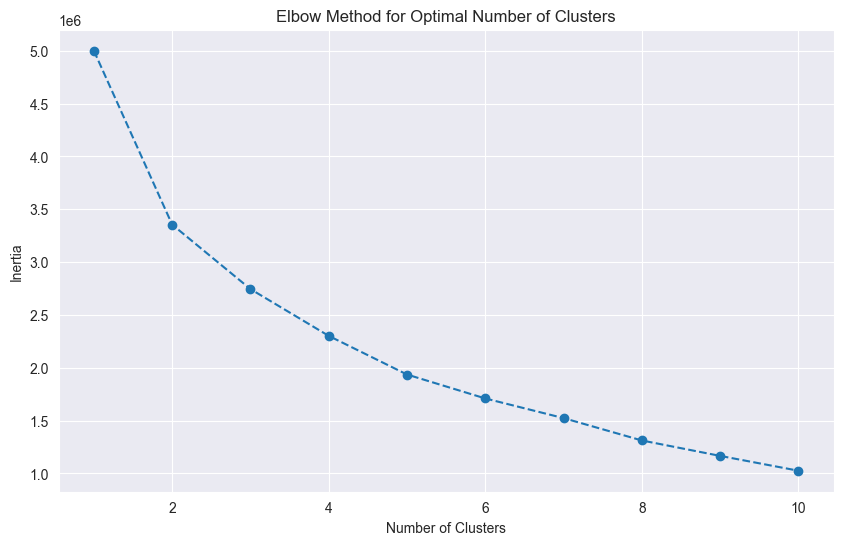

In [54]:
sea.set_style('darkgrid', {'axis.grid': True})

# Find the optimal number of clusters using the elbow method
inertia_values = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


* The plot displays the inertia (sum of squared distances from points to their assigned centers) for different numbers of clusters. While there's no distinct "elbow", we can see that the rate of decline in inertia starts to slow around 
k=3 or k=4.

* Given this observation, we can choose either 3 or 4 clusters. For this analysis, let's proceed with 4 clusters.

In [46]:
# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(data_normalized)

# Group by cluster to understand the centroid values (mean values) for each feature
cluster_characteristics = data_clustering.groupby('cluster')[features].mean()

cluster_characteristics

/Users/rodolfo/Desktop/Projects/Blockchain-Projects/Uniswap-User-Behaviour/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/r4/xg6xh1n11qqdk9l26twbw4zm0000gn/T/ipykernel_5035/1066969017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['cluster'] = kmeans.fit_predict(data_normalized)


,swap_count,vol_usd,revenue_usd,avg_tx_value,avg_gas_price
cluster,,,,,
0,26.352293,6.987443e+05,1.066648e+05,1.598026e+04,61.787179
1,54127.446154,4.433417e+09,5.581313e+08,1.672203e+05,105.993595
2,1.410596,5.518227e+04,1.265666e+04,2.754741e+04,5378.344096
3,10.279570,6.025639e+07,2.746788e+06,7.696517e+06,54.821536
